In [129]:
import pandas as pd
import talib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates




# AAPL

#### Reading the data

In [130]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\AAPL_historical_data.csv')

# Ensure the required columns are present
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df = df[required_columns]

# Display the first few rows of the data
print(df.head())

         Date      Open      High       Low     Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600


#### Analysis Indicators

                 Open       High        Low      Close     Volume      SMA20  \
Date                                                                           
2020-01-02  74.059998  75.150002  73.797501  75.087502  135480400  69.797249   
2020-01-03  74.287498  75.144997  74.125000  74.357498  146322800  70.243374   
2020-01-06  73.447502  74.989998  73.187500  74.949997  118387200  70.671124   
2020-01-07  74.959999  75.224998  74.370003  74.597504  108872000  71.017124   
2020-01-08  74.290001  76.110001  74.290001  75.797501  132079200  71.470499   

                  EMA        RSI      MACD  MACD_Signal  MACD_Hist    Return  \
Date                                                                           
2020-01-02  70.360946  84.583737  2.177467     1.831564   0.345902  0.022816   
2020-01-03  70.741570  77.703695  2.228504     1.910952   0.317552 -0.009722   
2020-01-06  71.142373  79.183674  2.290359     1.986833   0.303526  0.007968   
2020-01-07  71.471433  75.953553  2.284

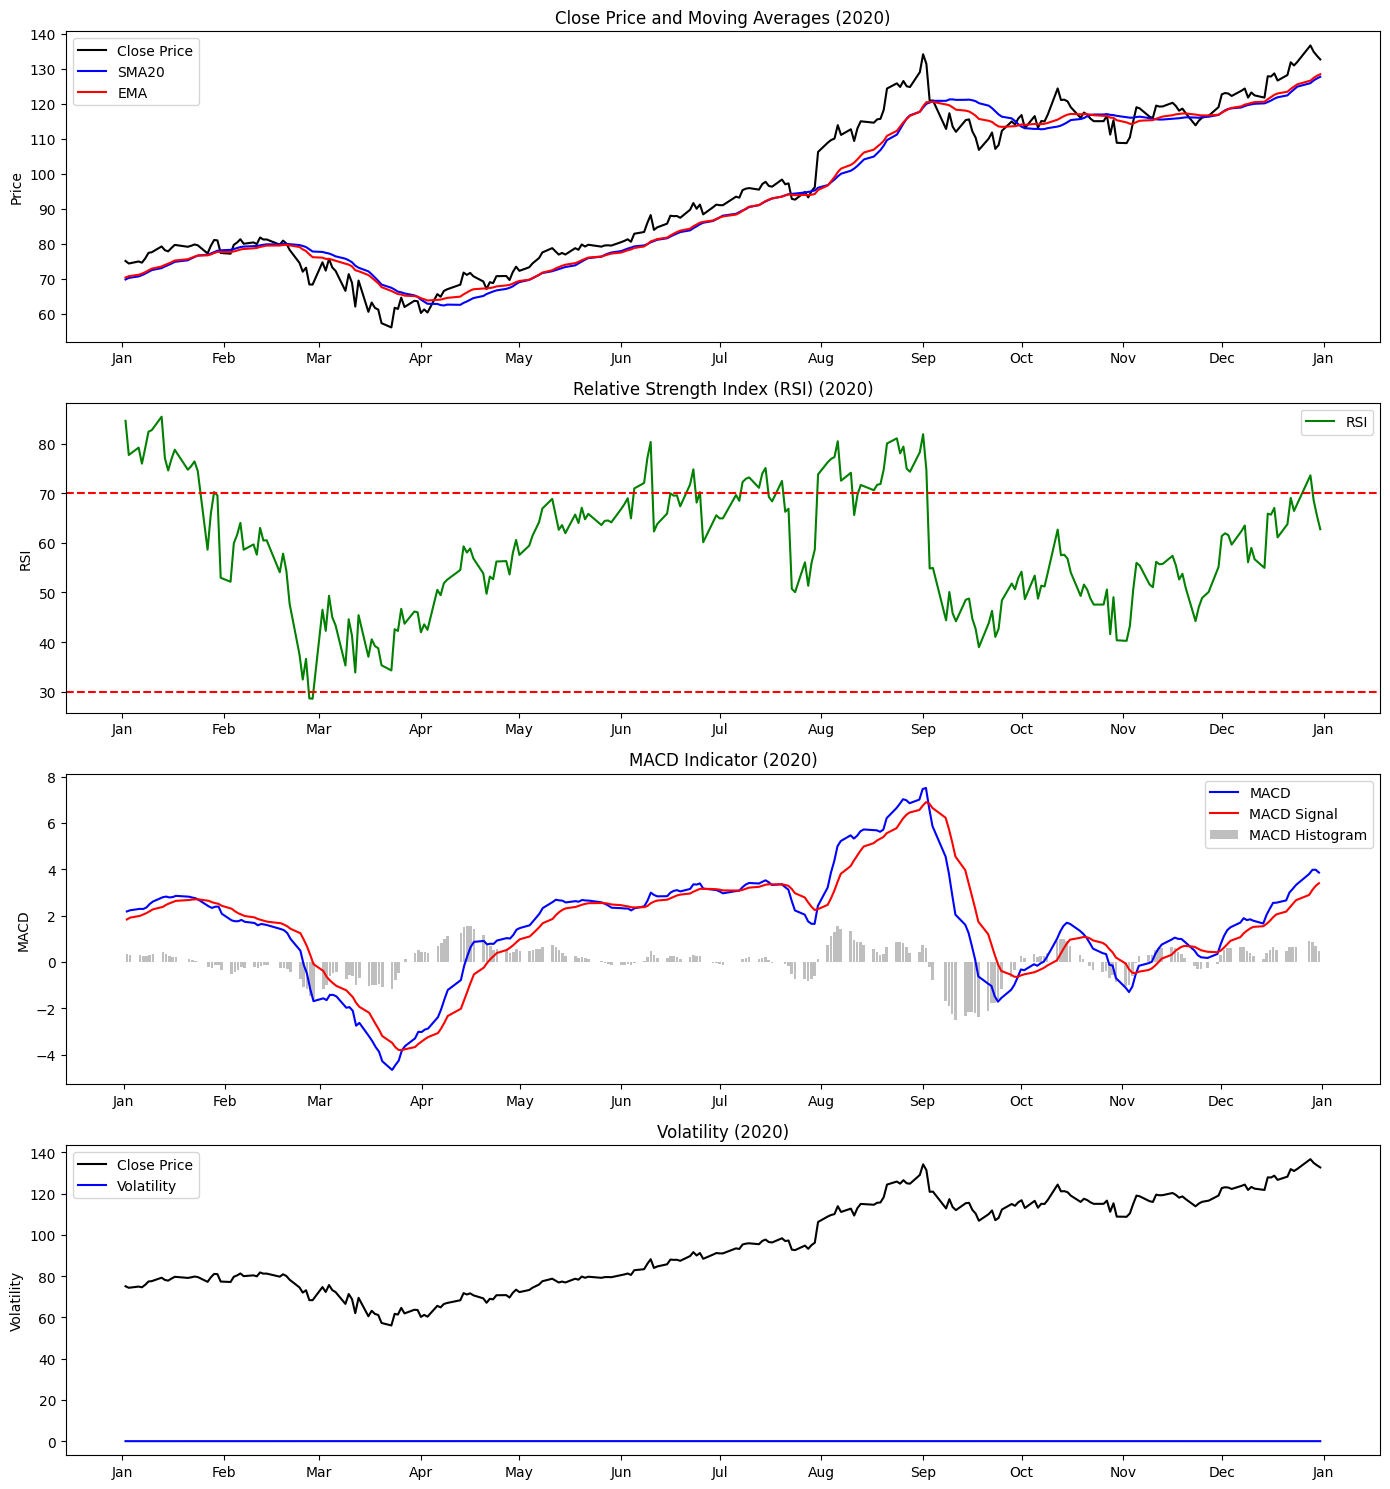

In [131]:
# Convert Date column to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])  # Corrected: Ensure 'Date' column is in datetime format
df.set_index('Date', inplace=True)

# Calculate 20-day Simple Moving Average (SMA) and 20-day Exponential Moving Average (EMA)
df['SMA20'] = talib.SMA(df['Close'], timeperiod=20)
df['EMA'] = talib.EMA(df['Close'], timeperiod=20)

# Calculate RSI (Relative Strength Index)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Calculate daily returns
df['Return'] = df['Close'].pct_change()

# Calculate rolling volatility (21-day rolling standard deviation of returns)
df['Volatility'] = df['Return'].rolling(window=21).std()

# Filter the DataFrame to include only data from 2020
df_2020 = df.loc['2020-01-01':'2020-12-31']  

# Display the filtered DataFrame with the new indicators
print(df_2020.head())

# Plotting
plt.figure(figsize=(14, 15))

# Plot Close Price and Moving Averages
plt.subplot(4, 1, 1)
plt.plot(df_2020['Close'], label='Close Price', color='black')
plt.plot(df_2020['SMA20'], label='SMA20', color='blue')
plt.plot(df_2020['EMA'], label='EMA', color='red')
plt.title('Close Price and Moving Averages (2020)')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot RSI
plt.subplot(4, 1, 2)
plt.plot(df_2020['RSI'], label='RSI', color='green')
plt.title('Relative Strength Index (RSI) (2020)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')
plt.ylabel('RSI')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot MACD
plt.subplot(4, 1, 3)
plt.plot(df_2020['MACD'], label='MACD', color='blue')
plt.plot(df_2020['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(df_2020.index, df_2020['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator (2020)')
plt.ylabel('MACD')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot Close Price and Volatility
plt.subplot(4, 1, 4)
plt.plot(df_2020['Close'], label='Close Price', color='black')
plt.plot(df_2020['Volatility'], label='Volatility', color='blue')
plt.title('Volatility (2020)')
plt.ylabel('Volatility')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()


# AMZN

#### Reading Data

In [132]:
# Load the CSV file into a Pandas DataFrame
dn = pd.read_csv(r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\AMZN_historical_data.csv')

# Ensure the required columns are present
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
dn = dn[required_columns]

# Display the first few rows of the data
print(dn.head())

         Date      Open      High       Low     Close      Volume
0  1997-05-15  0.121875  0.125000  0.096354  0.097917  1443120000
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   294000000
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   122136000
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   109344000
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   377064000


#### Analysis Indicators

                 Open       High        Low      Close    Volume      SMA20  \
Date                                                                          
2020-01-02  93.750000  94.900497  93.207497  94.900497  80580000  89.619200   
2020-01-03  93.224998  94.309998  93.224998  93.748497  75288000  89.904900   
2020-01-06  93.000000  95.184502  93.000000  95.143997  81236000  90.310899   
2020-01-07  95.224998  95.694504  94.601997  95.343002  80898000  90.699049   
2020-01-08  94.902000  95.550003  94.321999  94.598503  70160000  91.055199   

                  EMA        RSI      MACD  MACD_Signal  MACD_Hist    Return  \
Date                                                                           
2020-01-02  90.551620  72.356713  1.306534     0.731564   0.574970  0.027151   
2020-01-03  90.856084  65.341868  1.392250     0.863701   0.528548 -0.012139   
2020-01-06  91.264457  69.233083  1.554861     1.001933   0.552928  0.014886   
2020-01-07  91.652890  69.754588  1.680419    

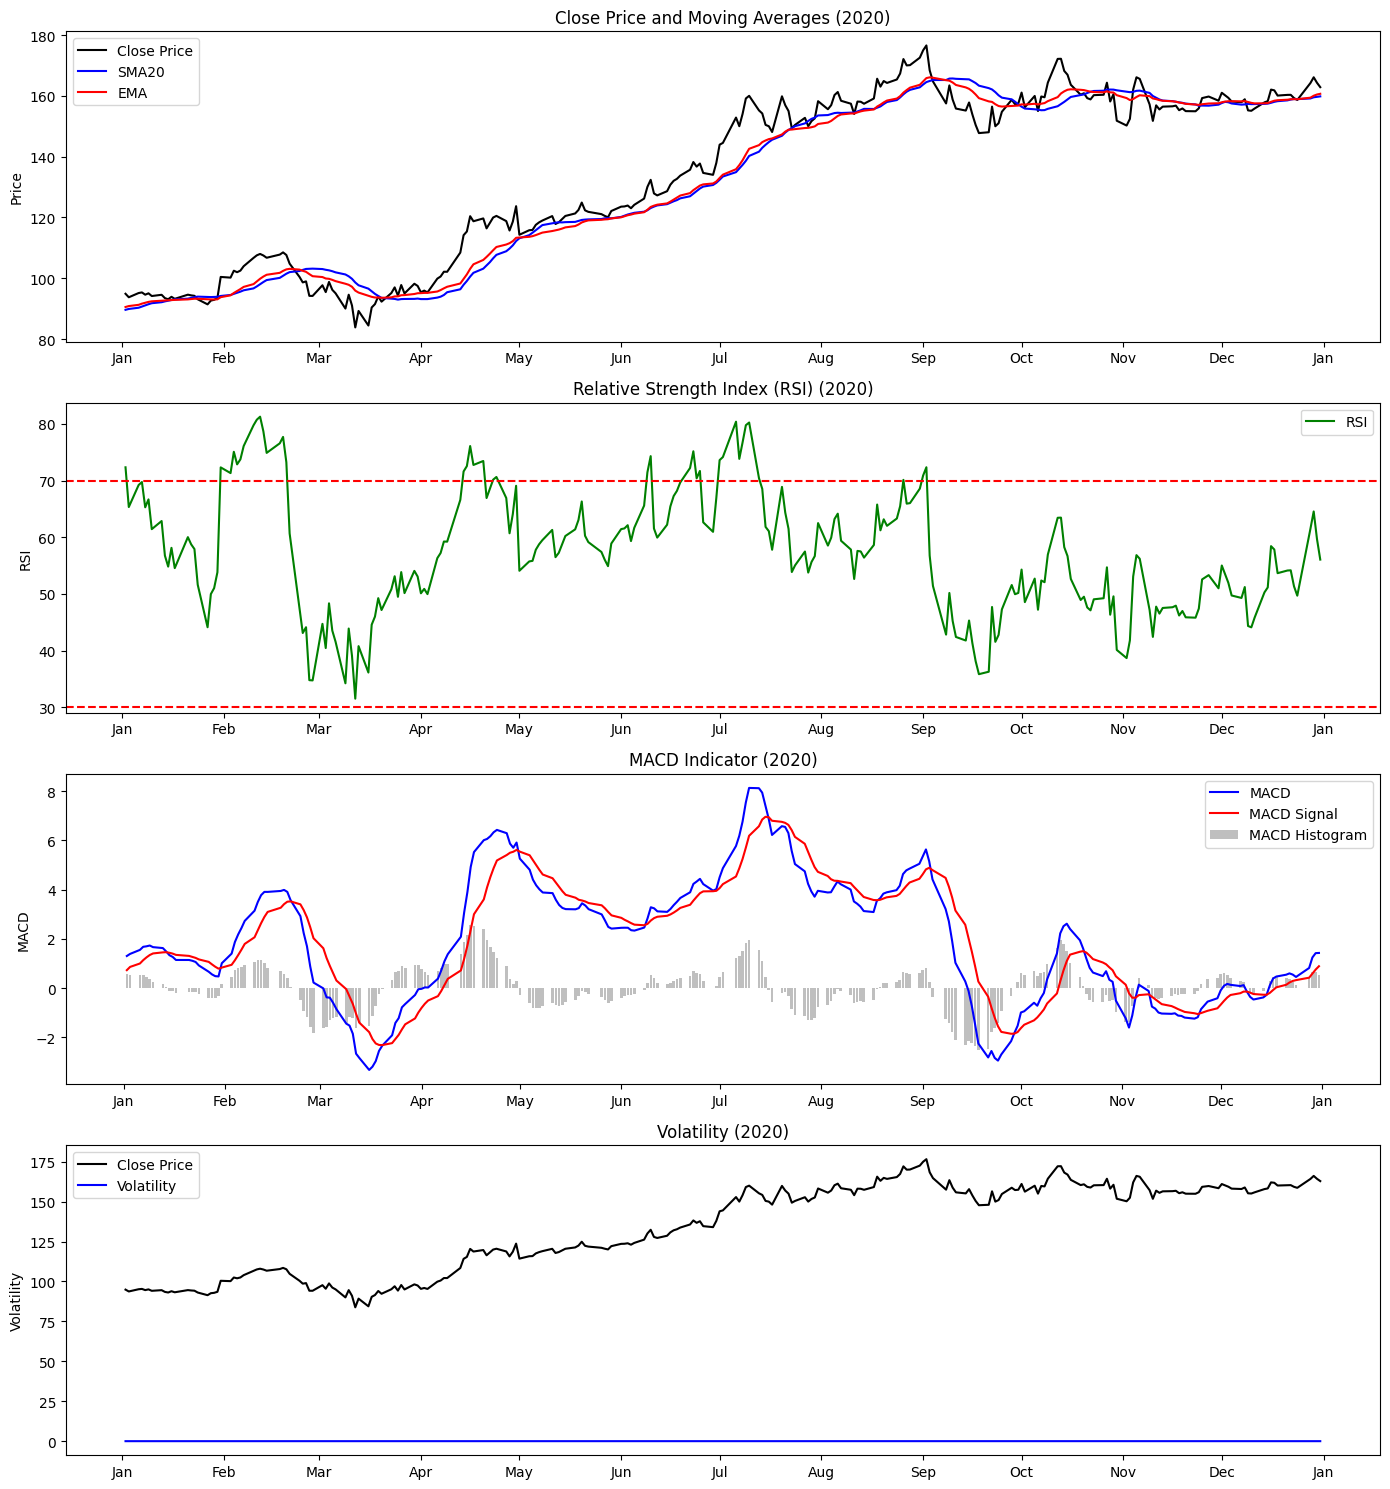

In [133]:
# Convert Date column to datetime if not already done
dn['Date'] = pd.to_datetime(dn['Date'])  # Corrected: Ensure 'Date' column is in datetime format
dn.set_index('Date', inplace=True)

# Calculate 20-day Simple Moving Average (SMA) and 20-day Exponential Moving Average (EMA)
dn['SMA20'] = talib.SMA(dn['Close'], timeperiod=20)
dn['EMA'] = talib.EMA(dn['Close'], timeperiod=20)

# Calculate RSI (Relative Strength Index)
dn['RSI'] = talib.RSI(dn['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(dn['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
dn['MACD'] = macd
dn['MACD_Signal'] = macdsignal
dn['MACD_Hist'] = macdhist

# Calculate daily returns
dn['Return'] = dn['Close'].pct_change()

# Calculate rolling volatility (21-day rolling standard deviation of returns)
dn['Volatility'] = dn['Return'].rolling(window=21).std()

# Filter the DataFrame to include only data from 2020
dn_2020 = dn.loc['2020-01-01':'2020-12-31']  

# Display the filtered DataFrame with the new indicators
print(dn_2020.head())

# Plotting
plt.figure(figsize=(14, 15))

# Plot Close Price and Moving Averages
plt.subplot(4, 1, 1)
plt.plot(dn_2020['Close'], label='Close Price', color='black')
plt.plot(dn_2020['SMA20'], label='SMA20', color='blue')
plt.plot(dn_2020['EMA'], label='EMA', color='red')
plt.title('Close Price and Moving Averages (2020)')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot RSI
plt.subplot(4, 1, 2)
plt.plot(dn_2020['RSI'], label='RSI', color='green')
plt.title('Relative Strength Index (RSI) (2020)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')
plt.ylabel('RSI')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot MACD
plt.subplot(4, 1, 3)
plt.plot(dn_2020['MACD'], label='MACD', color='blue')
plt.plot(dn_2020['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(dn_2020.index, dn_2020['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator (2020)')
plt.ylabel('MACD')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot Close Price and Volatility
plt.subplot(4, 1, 4)
plt.plot(dn_2020['Close'], label='Close Price', color='black')
plt.plot(dn_2020['Volatility'], label='Volatility', color='blue')
plt.title('Volatility (2020)')
plt.ylabel('Volatility')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

# GOOG

#### Reading the data

In [134]:
# Load the CSV file into a Pandas DataFrame
dg = pd.read_csv(r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\GOOG_historical_data.csv')

# Ensure the required columns are present
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
dg = dg[required_columns]

# Display the first few rows of the data
print(dg.head())

         Date      Open      High       Low     Close     Volume
0  2004-08-19  2.490664  2.591785  2.390042  2.499133  897427216
1  2004-08-20  2.515820  2.716817  2.503118  2.697639  458857488
2  2004-08-23  2.758411  2.826406  2.716070  2.724787  366857939
3  2004-08-24  2.770615  2.779581  2.579581  2.611960  306396159
4  2004-08-25  2.614201  2.689918  2.587302  2.640104  184645512


#### Analyzing Indicators

                 Open       High        Low      Close    Volume      SMA20  \
Date                                                                          
2020-01-02  67.077499  68.406998  67.077499  68.368500  28132000  67.350975   
2020-01-03  67.392998  68.625000  67.277199  68.032997  23728000  67.451274   
2020-01-06  67.500000  69.824997  67.500000  69.710503  34646000  67.616475   
2020-01-07  69.897003  70.149498  69.518997  69.667000  30054000  67.748275   
2020-01-08  69.603996  70.579002  69.542000  70.216003  30560000  67.900175   

                  EMA        RSI      MACD  MACD_Signal  MACD_Hist    Return  \
Date                                                                           
2020-01-02  67.113821  63.307875  0.577685     0.681137  -0.103453  0.022700   
2020-01-03  67.201362  59.919179  0.584163     0.661742  -0.077580 -0.004907   
2020-01-06  67.440327  68.886721  0.716399     0.672674   0.043725  0.024657   
2020-01-07  67.652391  68.458956  0.808368    

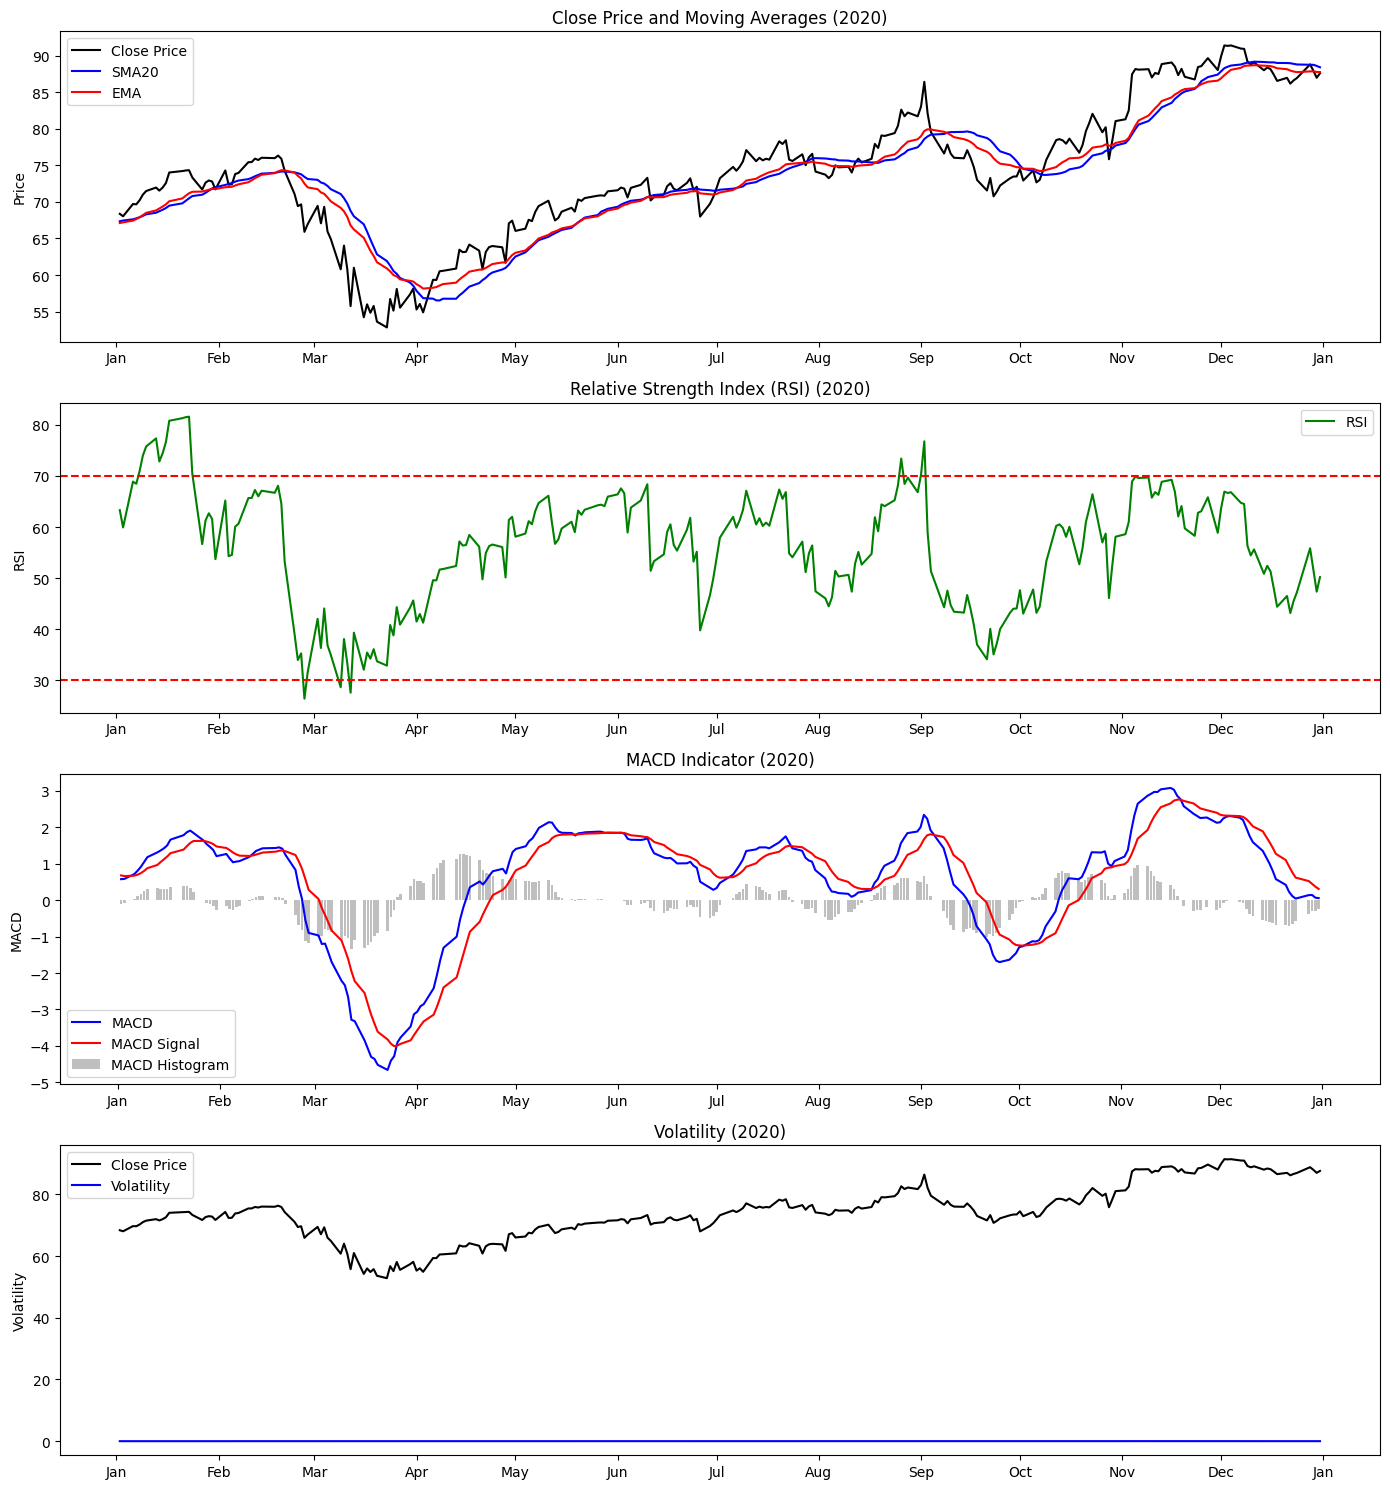

In [135]:
# Convert Date column to datetime if not already done
dg['Date'] = pd.to_datetime(dg['Date'])  # Corrected: Ensure 'Date' column is in datetime format
dg.set_index('Date', inplace=True)

# Calculate 20-day Simple Moving Average (SMA) and 20-day Exponential Moving Average (EMA)
dg['SMA20'] = talib.SMA(dg['Close'], timeperiod=20)
dg['EMA'] = talib.EMA(dg['Close'], timeperiod=20)

# Calculate RSI (Relative Strength Index)
dg['RSI'] = talib.RSI(dg['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(dg['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
dg['MACD'] = macd
dg['MACD_Signal'] = macdsignal
dg['MACD_Hist'] = macdhist

# Calculate daily returns
dg['Return'] = dg['Close'].pct_change()

# Calculate rolling volatility (21-day rolling standard deviation of returns)
dg['Volatility'] = dg['Return'].rolling(window=21).std()

# Filter the DataFrame to include only data from 2020
dg_2020 = dg.loc['2020-01-01':'2020-12-31']  

# Display the filtered DataFrame with the new indicators
print(dg_2020.head())

# Plotting
plt.figure(figsize=(14, 15))

# Plot Close Price and Moving Averages
plt.subplot(4, 1, 1)
plt.plot(dg_2020['Close'], label='Close Price', color='black')
plt.plot(dg_2020['SMA20'], label='SMA20', color='blue')
plt.plot(dg_2020['EMA'], label='EMA', color='red')
plt.title('Close Price and Moving Averages (2020)')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot RSI
plt.subplot(4, 1, 2)
plt.plot(dg_2020['RSI'], label='RSI', color='green')
plt.title('Relative Strength Index (RSI) (2020)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')
plt.ylabel('RSI')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot MACD
plt.subplot(4, 1, 3)
plt.plot(dg_2020['MACD'], label='MACD', color='blue')
plt.plot(dg_2020['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(dg_2020.index, dg_2020['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator (2020)')
plt.ylabel('MACD')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot Close Price and Volatility
plt.subplot(4, 1, 4)
plt.plot(dg_2020['Close'], label='Close Price', color='black')
plt.plot(dg_2020['Volatility'], label='Volatility', color='blue')
plt.title('Volatility (2020)')
plt.ylabel('Volatility')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

# META

#### Reading Data

In [136]:
# Load the CSV file into a Pandas DataFrame
dm = pd.read_csv(r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\META_historical_data.csv')

# Ensure the required columns are present
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
dm = dm[required_columns]

# Display the first few rows of the data
print(dm.head())

         Date       Open       High        Low      Close    Volume
0  2012-12-12  28.000000  28.139999  27.370001  27.580000  46704200
1  2012-12-13  27.590000  28.750000  27.430000  28.240000  81051600
2  2012-12-14  28.180000  28.330000  26.760000  26.809999  91631600
3  2012-12-17  26.770000  27.000000  26.320000  26.750000  57742500
4  2012-12-18  26.959999  27.910000  26.900000  27.709999  60512900


#### Analyzing Indicators

                  Open        High         Low       Close    Volume  \
Date                                                                   
2020-01-02  206.750000  209.789993  206.270004  209.779999  12077100   
2020-01-03  207.210007  210.399994  206.949997  208.669998  11188400   
2020-01-06  206.699997  212.779999  206.520004  212.600006  17058900   
2020-01-07  212.820007  214.580002  211.750000  213.059998  14912400   
2020-01-08  213.000000  216.240005  212.610001  215.220001  13475000   

                 SMA20         EMA        RSI      MACD  MACD_Signal  \
Date                                                                   
2020-01-02  202.612499  203.321175  65.421149  2.950053     2.649862   
2020-01-03  203.110499  203.830587  62.680632  3.017246     2.723339   
2020-01-06  203.772499  204.665770  67.820464  3.349010     2.848473   
2020-01-07  204.372999  205.465220  68.369576  3.607469     3.000272   
2020-01-08  205.066999  206.394247  70.882207  3.941162     3.1

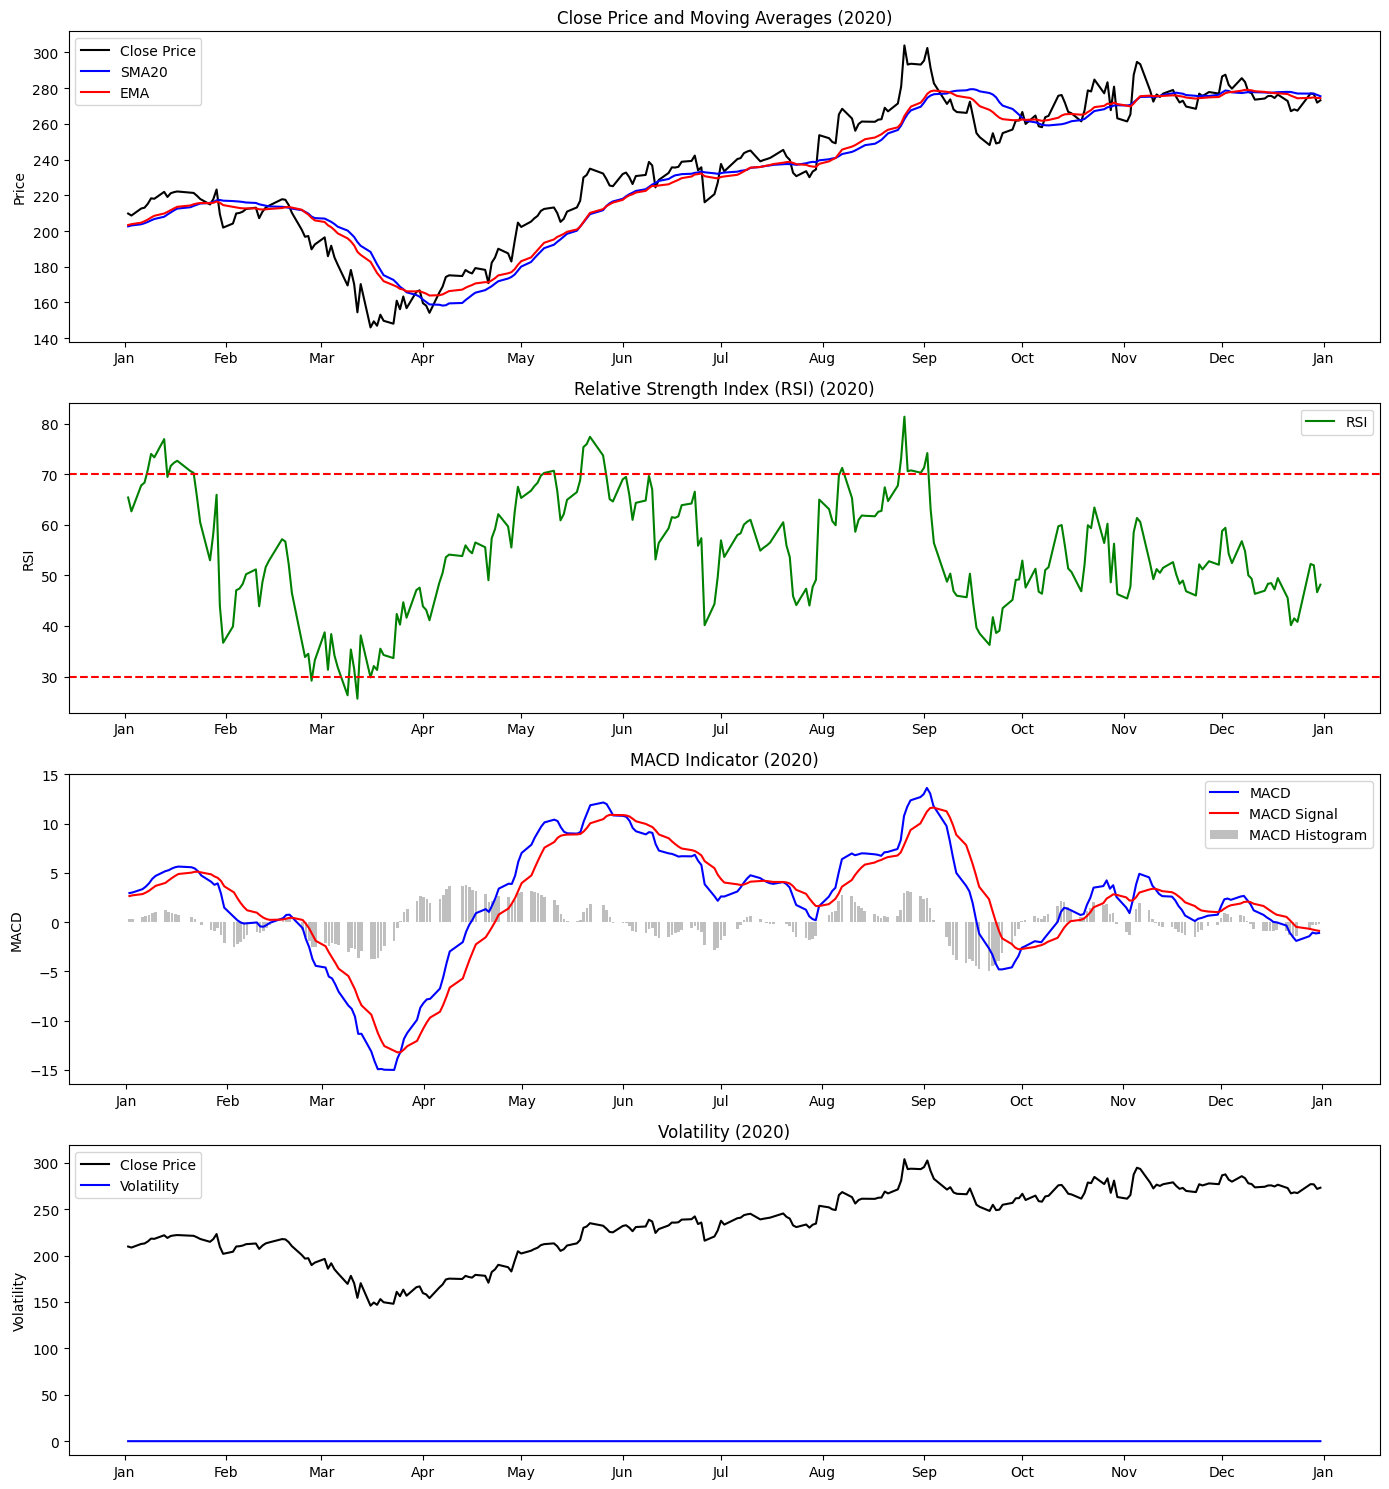

In [137]:
# Convert Date column to datetime if not already done
dm['Date'] = pd.to_datetime(dm['Date'])  # Corrected: Ensure 'Date' column is in datetime format
dm.set_index('Date', inplace=True)

# Calculate 20-day Simple Moving Average (SMA) and 20-day Exponential Moving Average (EMA)
dm['SMA20'] = talib.SMA(dm['Close'], timeperiod=20)
dm['EMA'] = talib.EMA(dm['Close'], timeperiod=20)

# Calculate RSI (Relative Strength Index)
dm['RSI'] = talib.RSI(dm['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(dm['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
dm['MACD'] = macd
dm['MACD_Signal'] = macdsignal
dm['MACD_Hist'] = macdhist

# Calculate daily returns
dm['Return'] = dm['Close'].pct_change()

# Calculate rolling volatility (21-day rolling standard deviation of returns)
dm['Volatility'] = dm['Return'].rolling(window=21).std()

# Filter the DataFrame to include only data from 2020
dm_2020 = dm.loc['2020-01-01':'2020-12-31']  

# Display the filtered DataFrame with the new indicators
print(dm_2020.head())

# Plotting
plt.figure(figsize=(14, 15))

# Plot Close Price and Moving Averages
plt.subplot(4, 1, 1)
plt.plot(dm_2020['Close'], label='Close Price', color='black')
plt.plot(dm_2020['SMA20'], label='SMA20', color='blue')
plt.plot(dm_2020['EMA'], label='EMA', color='red')
plt.title('Close Price and Moving Averages (2020)')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot RSI
plt.subplot(4, 1, 2)
plt.plot(dm_2020['RSI'], label='RSI', color='green')
plt.title('Relative Strength Index (RSI) (2020)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')
plt.ylabel('RSI')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot MACD
plt.subplot(4, 1, 3)
plt.plot(dm_2020['MACD'], label='MACD', color='blue')
plt.plot(dm_2020['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(dm_2020.index, dm_2020['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator (2020)')
plt.ylabel('MACD')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot Close Price and Volatility
plt.subplot(4, 1, 4)
plt.plot(dm_2020['Close'], label='Close Price', color='black')
plt.plot(dm_2020['Volatility'], label='Volatility', color='blue')
plt.title('Volatility (2020)')
plt.ylabel('Volatility')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

# MSFT

#### Reading Data

In [138]:
# Load the CSV file into a Pandas DataFrame
dms = pd.read_csv(r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\MSFT_historical_data.csv')

# Ensure the required columns are present
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
dms = dms[required_columns]

# Display the first few rows of the data
print(dms.head())

         Date      Open      High       Low     Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090    47894400


#### Analyzing Indicators

                  Open        High         Low       Close    Volume  \
Date                                                                   
2020-01-02  158.779999  160.729996  158.330002  160.619995  22622100   
2020-01-03  158.320007  159.949997  158.059998  158.619995  21116200   
2020-01-06  157.080002  159.100006  156.509995  159.029999  20813700   
2020-01-07  159.320007  159.669998  157.320007  157.580002  21634100   
2020-01-08  158.929993  160.800003  157.949997  160.089996  27746500   

                 SMA20         EMA        RSI      MACD  MACD_Signal  \
Date                                                                   
2020-01-02  154.976501  155.494847  76.237642  2.734446     2.567812   
2020-01-03  155.415000  155.792480  65.516791  2.651697     2.584589   
2020-01-06  155.870000  156.100815  66.555113  2.589354     2.585542   
2020-01-07  156.161501  156.241690  59.707811  2.395331     2.547500   
2020-01-08  156.598000  156.608195  66.191903  2.416250     2.5

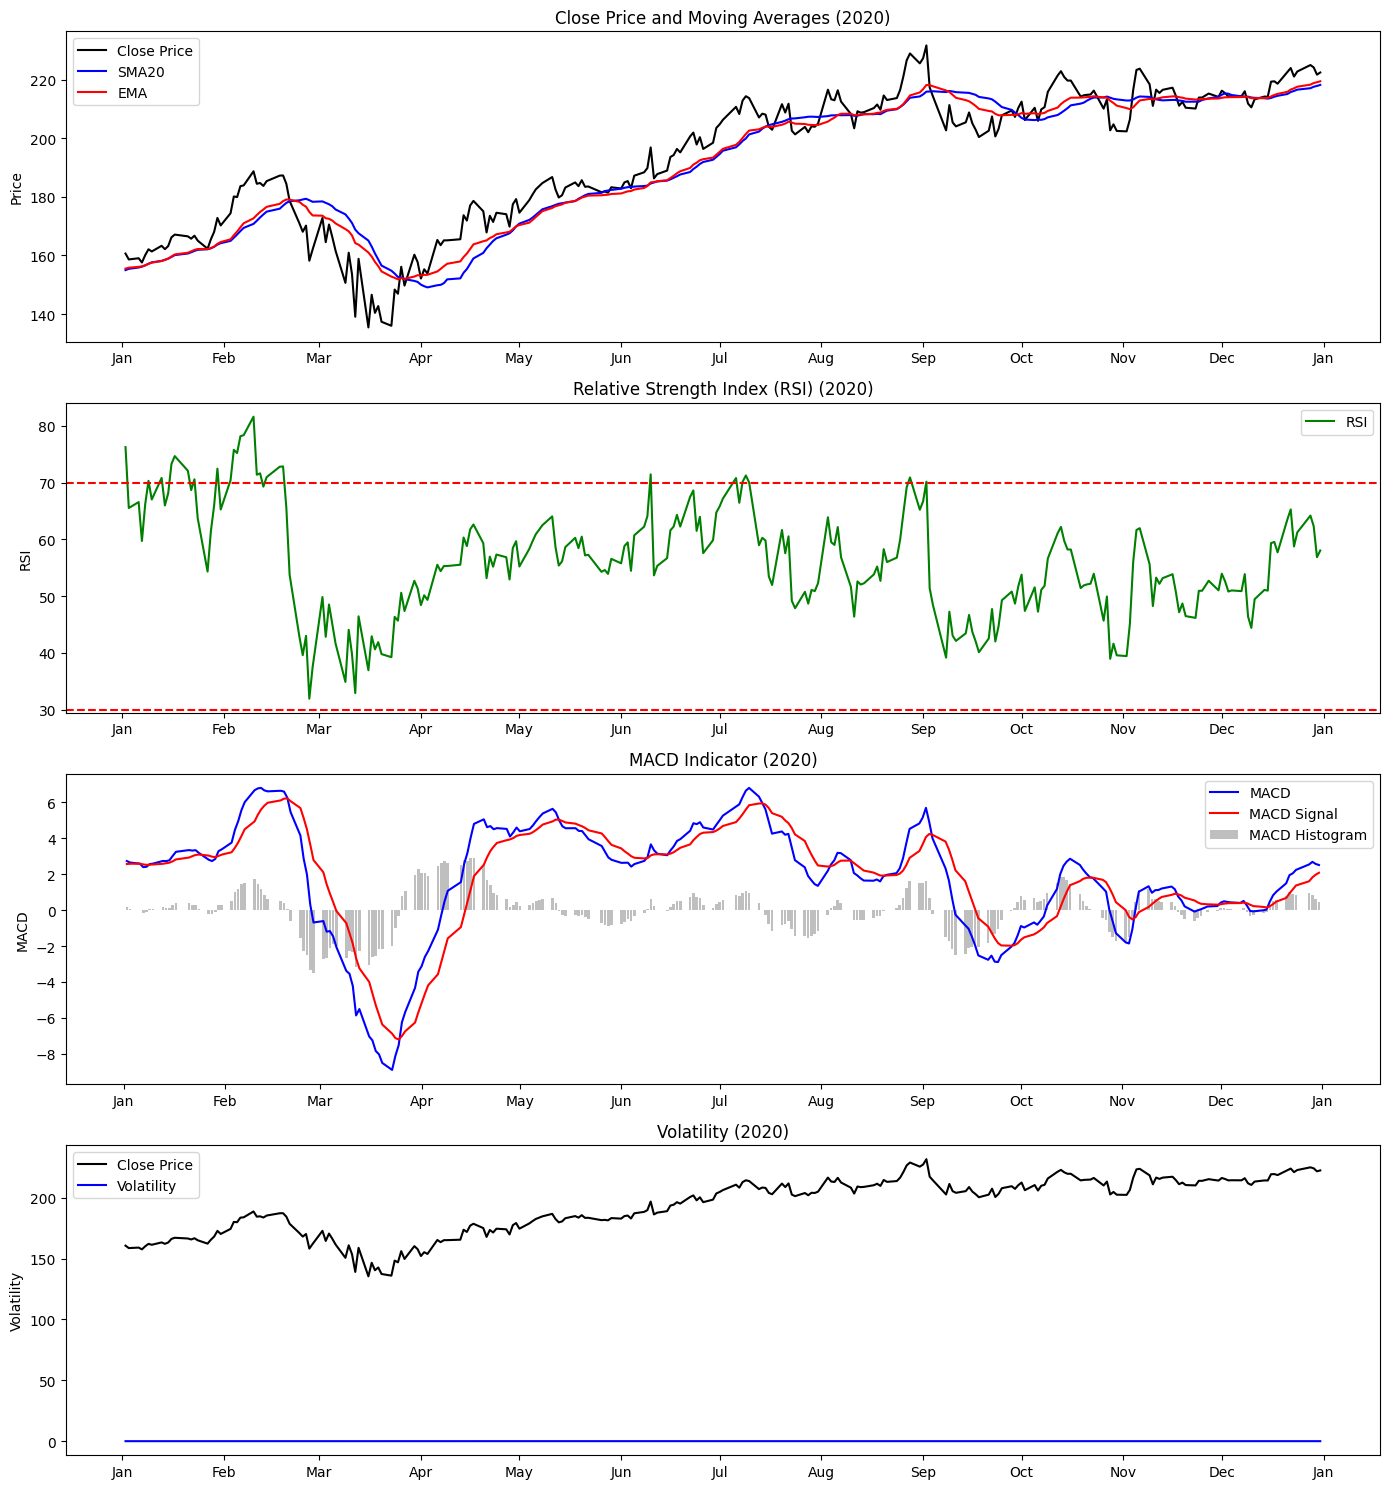

In [139]:
# Convert Date column to datetime if not already done
dms['Date'] = pd.to_datetime(dms['Date'])  # Corrected: Ensure 'Date' column is in datetime format
dms.set_index('Date', inplace=True)

# Calculate 20-day Simple Moving Average (SMA) and 20-day Exponential Moving Average (EMA)
dms['SMA20'] = talib.SMA(dms['Close'], timeperiod=20)
dms['EMA'] = talib.EMA(dms['Close'], timeperiod=20)

# Calculate RSI (Relative Strength Index)
dms['RSI'] = talib.RSI(dms['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(dms['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
dms['MACD'] = macd
dms['MACD_Signal'] = macdsignal
dms['MACD_Hist'] = macdhist

# Calculate daily returns
dms['Return'] = dms['Close'].pct_change()

# Calculate rolling volatility (21-day rolling standard deviation of returns)
dms['Volatility'] = dms['Return'].rolling(window=21).std()

# Filter the DataFrame to include only data from 2020
dms_2020 = dms.loc['2020-01-01':'2020-12-31']  

# Display the filtered DataFrame with the new indicators
print(dms_2020.head())

# Plotting
plt.figure(figsize=(14, 15))

# Plot Close Price and Moving Averages
plt.subplot(4, 1, 1)
plt.plot(dms_2020['Close'], label='Close Price', color='black')
plt.plot(dms_2020['SMA20'], label='SMA20', color='blue')
plt.plot(dms_2020['EMA'], label='EMA', color='red')
plt.title('Close Price and Moving Averages (2020)')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot RSI
plt.subplot(4, 1, 2)
plt.plot(dms_2020['RSI'], label='RSI', color='green')
plt.title('Relative Strength Index (RSI) (2020)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')
plt.ylabel('RSI')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot MACD
plt.subplot(4, 1, 3)
plt.plot(dms_2020['MACD'], label='MACD', color='blue')
plt.plot(dms_2020['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(dms_2020.index, dms_2020['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator (2020)')
plt.ylabel('MACD')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot Close Price and Volatility
plt.subplot(4, 1, 4)
plt.plot(dms_2020['Close'], label='Close Price', color='black')
plt.plot(dms_2020['Volatility'], label='Volatility', color='blue')
plt.title('Volatility (2020)')
plt.ylabel('Volatility')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

# NVDA


#### Reading Data

In [140]:
# Load the CSV file into a Pandas DataFrame
dmv = pd.read_csv(r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\NVDA_historical_data.csv')

# Ensure the required columns are present
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
dmv = dmv[required_columns]

# Display the first few rows of the data
print(dmv.head())

         Date      Open      High       Low     Close      Volume
0  1999-01-22  0.043750  0.048828  0.038802  0.041016  2714688000
1  1999-01-25  0.044271  0.045833  0.041016  0.045313   510480000
2  1999-01-26  0.045833  0.046745  0.041146  0.041797   343200000
3  1999-01-27  0.041927  0.042969  0.039583  0.041667   244368000
4  1999-01-28  0.041667  0.041927  0.041276  0.041536   227520000


#### Analyzing Indicators

               Open     High      Low    Close     Volume     SMA20       EMA  \
Date                                                                            
2020-01-02  5.96875  5.99775  5.91800  5.99775  237536000  5.675862  5.727043   
2020-01-03  5.87750  5.94575  5.85250  5.90175  205384000  5.709175  5.743682   
2020-01-06  5.80800  5.93175  5.78175  5.92650  262636000  5.744575  5.761093   
2020-01-07  5.95500  6.04425  5.90975  5.99825  314856000  5.779275  5.783679   
2020-01-08  5.99400  6.05100  5.95375  6.00950  277108000  5.814538  5.805186   

                  RSI      MACD  MACD_Signal  MACD_Hist    Return  Volatility  
Date                                                                           
2020-01-02  69.941889  0.184575     0.179626   0.004949  0.019592    0.012234  
2020-01-03  63.165915  0.176051     0.178911  -0.002860 -0.016006    0.012845  
2020-01-06  64.130727  0.169341     0.176997  -0.007656  0.004194    0.012841  
2020-01-07  66.842256  0.167877 

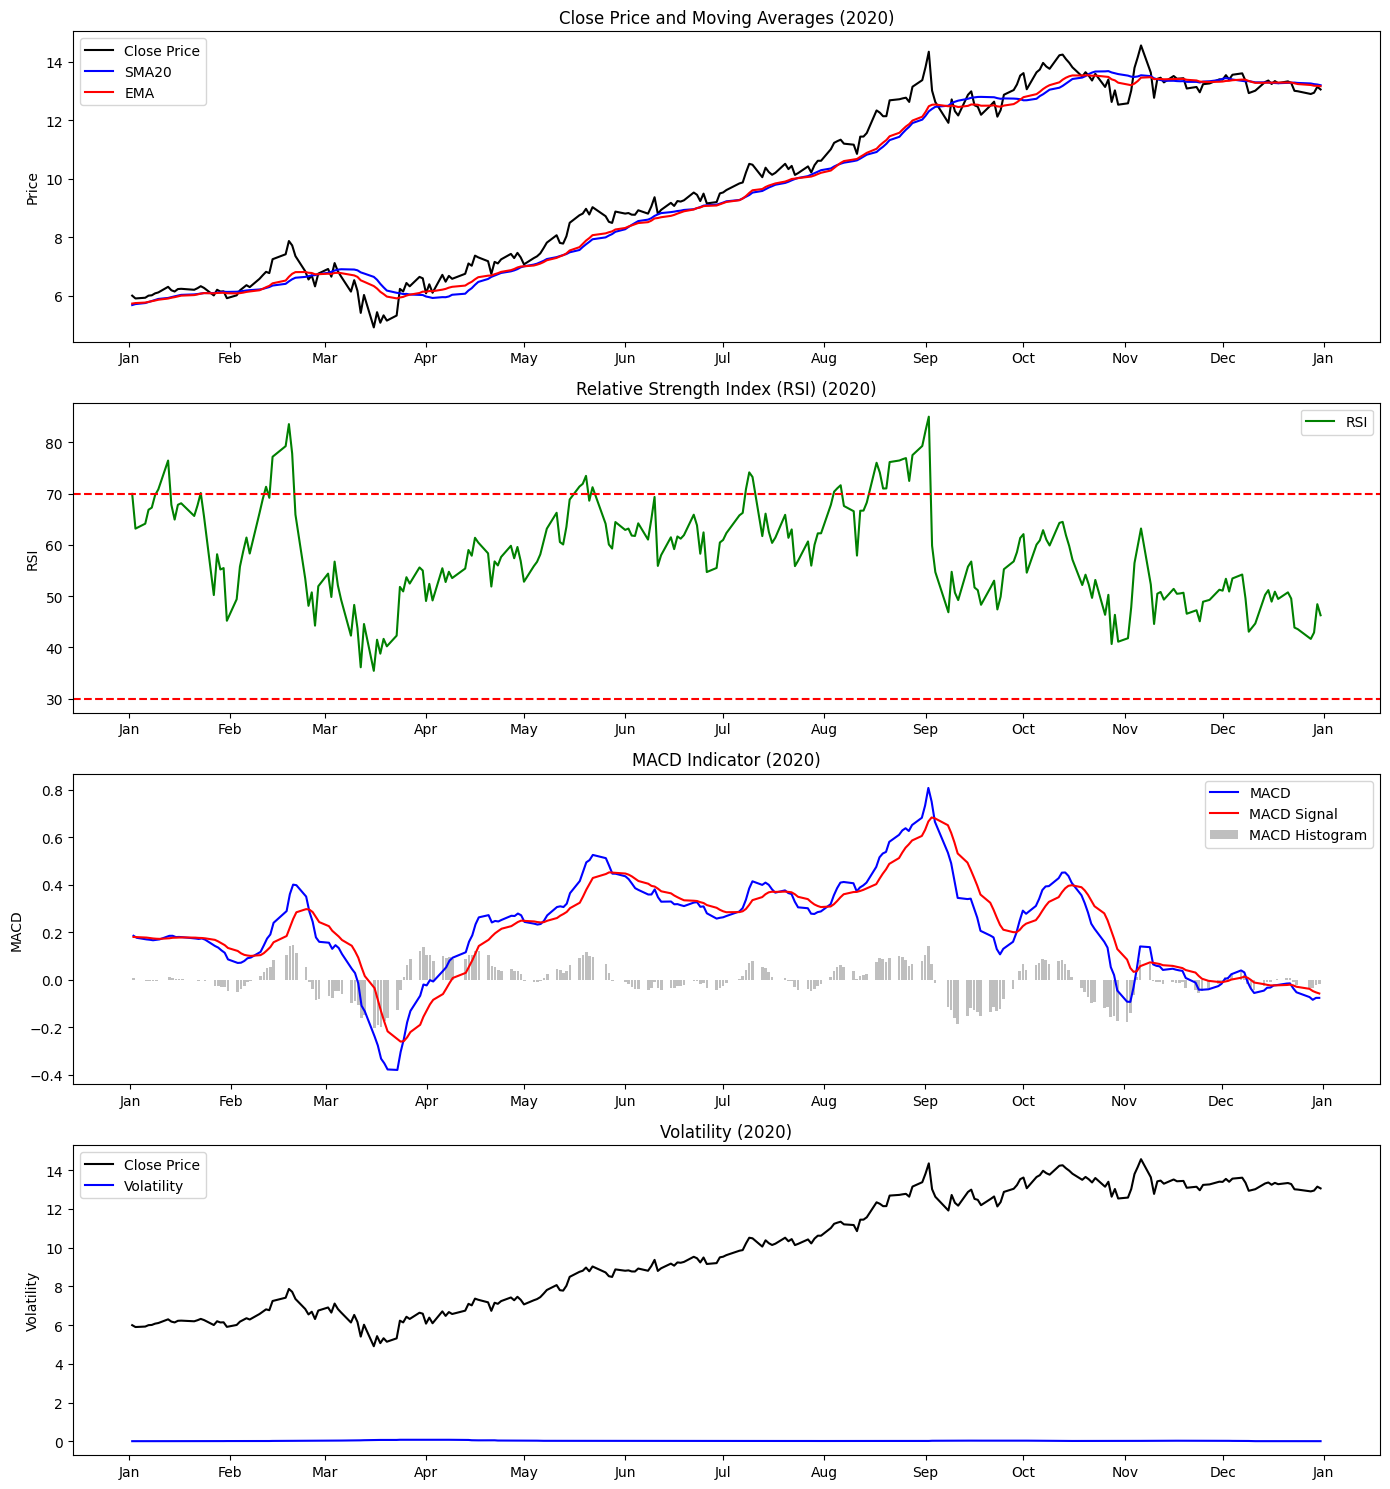

In [141]:
# Convert Date column to datetime if not already done
dmv['Date'] = pd.to_datetime(dmv['Date'])  # Corrected: Ensure 'Date' column is in datetime format
dmv.set_index('Date', inplace=True)

# Calculate 20-day Simple Moving Average (SMA) and 20-day Exponential Moving Average (EMA)
dmv['SMA20'] = talib.SMA(dmv['Close'], timeperiod=20)
dmv['EMA'] = talib.EMA(dmv['Close'], timeperiod=20)

# Calculate RSI (Relative Strength Index)
dmv['RSI'] = talib.RSI(dmv['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(dmv['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
dmv['MACD'] = macd
dmv['MACD_Signal'] = macdsignal
dmv['MACD_Hist'] = macdhist

# Calculate daily returns
dmv['Return'] = dmv['Close'].pct_change()

# Calculate rolling volatility (21-day rolling standard deviation of returns)
dmv['Volatility'] = dmv['Return'].rolling(window=21).std()

# Filter the DataFrame to include only data from 2020
dmv_2020 = dmv.loc['2020-01-01':'2020-12-31']  

# Display the filtered DataFrame with the new indicators
print(dmv_2020.head())

# Plotting
plt.figure(figsize=(14, 15))

# Plot Close Price and Moving Averages
plt.subplot(4, 1, 1)
plt.plot(dmv_2020['Close'], label='Close Price', color='black')
plt.plot(dmv_2020['SMA20'], label='SMA20', color='blue')
plt.plot(dmv_2020['EMA'], label='EMA', color='red')
plt.title('Close Price and Moving Averages (2020)')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot RSI
plt.subplot(4, 1, 2)
plt.plot(dmv_2020['RSI'], label='RSI', color='green')
plt.title('Relative Strength Index (RSI) (2020)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')
plt.ylabel('RSI')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot MACD
plt.subplot(4, 1, 3)
plt.plot(dmv_2020['MACD'], label='MACD', color='blue')
plt.plot(dmv_2020['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(dmv_2020.index, dmv_2020['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator (2020)')
plt.ylabel('MACD')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot Close Price and Volatility
plt.subplot(4, 1, 4)
plt.plot(dmv_2020['Close'], label='Close Price', color='black')
plt.plot(dmv_2020['Volatility'], label='Volatility', color='blue')
plt.title('Volatility (2020)')
plt.ylabel('Volatility')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

# TSLA

#### Reading Data

In [142]:
# Load the CSV file into a Pandas DataFrame
dt = pd.read_csv(r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\TSLA_historical_data.csv')

# Ensure the required columns are present
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
dt = dt[required_columns]

# Display the first few rows of the data
print(dt.head())

         Date      Open      High       Low     Close     Volume
0  2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500
1  2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500
2  2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000
4  2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500


#### Analyzing Indicators

                 Open       High        Low      Close     Volume      SMA20  \
Date                                                                           
2020-01-02  28.299999  28.713333  28.114000  28.684000  142981500  25.635933   
2020-01-03  29.366667  30.266666  29.128000  29.534000  266677500  26.002533   
2020-01-06  29.364668  30.104000  29.333332  30.102667  151995000  26.406433   
2020-01-07  30.760000  31.441999  30.224001  31.270666  268231500  26.850333   
2020-01-08  31.580000  33.232666  31.215334  32.809334  467164500  27.359033   

                  EMA        RSI      MACD  MACD_Signal  MACD_Hist    Return  \
Date                                                                           
2020-01-02  26.206907  75.726622  1.671410     1.506794   0.164616  0.028518   
2020-01-03  26.523773  78.627413  1.731141     1.551663   0.179478  0.029633   
2020-01-06  26.864620  80.321736  1.803574     1.602045   0.201529  0.019255   
2020-01-07  27.284244  83.257546  1.932

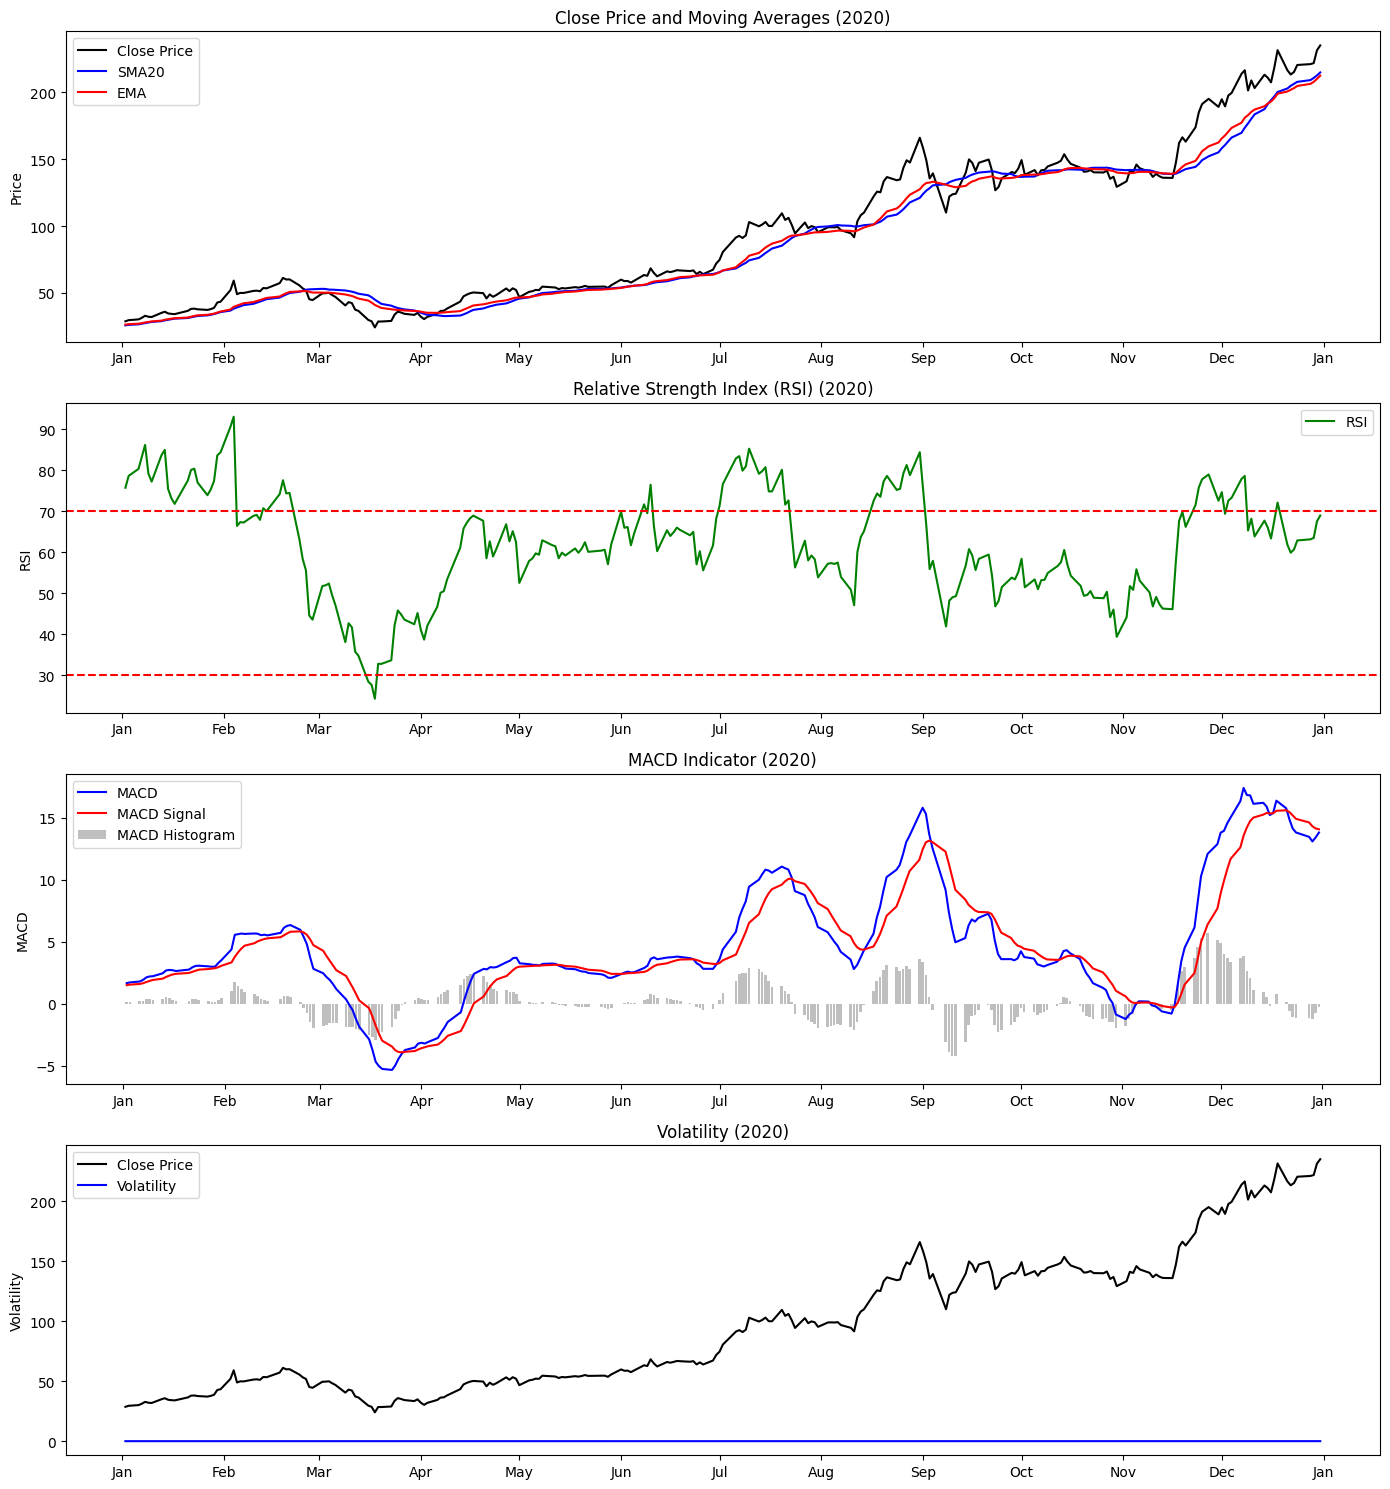

In [143]:
# Convert Date column to datetime if not already done
dt['Date'] = pd.to_datetime(dt['Date'])  # Corrected: Ensure 'Date' column is in datetime format
dt.set_index('Date', inplace=True)

# Calculate 20-day Simple Moving Average (SMA) and 20-day Exponential Moving Average (EMA)
dt['SMA20'] = talib.SMA(dt['Close'], timeperiod=20)
dt['EMA'] = talib.EMA(dt['Close'], timeperiod=20)

# Calculate RSI (Relative Strength Index)
dt['RSI'] = talib.RSI(dt['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(dt['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
dt['MACD'] = macd
dt['MACD_Signal'] = macdsignal
dt['MACD_Hist'] = macdhist

# Calculate daily returns
dt['Return'] = dt['Close'].pct_change()

# Calculate rolling volatility (21-day rolling standard deviation of returns)
dt['Volatility'] = dt['Return'].rolling(window=21).std()

# Filter the DataFrame to include only data from 2020
dt_2020 = dt.loc['2020-01-01':'2020-12-31']  

# Display the filtered DataFrame with the new indicatorsSSSSS
print(dt_2020.head())

# Plotting
plt.figure(figsize=(14, 15))

# Plot Close Price and Moving Averages
plt.subplot(4, 1, 1)
plt.plot(dt_2020['Close'], label='Close Price', color='black')
plt.plot(dt_2020['SMA20'], label='SMA20', color='blue')
plt.plot(dt_2020['EMA'], label='EMA', color='red')
plt.title('Close Price and Moving Averages (2020)')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot RSI
plt.subplot(4, 1, 2)
plt.plot(dt_2020['RSI'], label='RSI', color='green')
plt.title('Relative Strength Index (RSI) (2020)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')
plt.ylabel('RSI')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot MACD
plt.subplot(4, 1, 3)
plt.plot(dt_2020['MACD'], label='MACD', color='blue')
plt.plot(dt_2020['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(dt_2020.index, dt_2020['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator (2020)')
plt.ylabel('MACD')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot Close Price and Volatility
plt.subplot(4, 1, 4)
plt.plot(dt_2020['Close'], label='Close Price', color='black')
plt.plot(dt_2020['Volatility'], label='Volatility', color='blue')
plt.title('Volatility (2020)')
plt.ylabel('Volatility')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()